# House Prices: Linear Regression

# Step I: Remember
I am trying to implement here the single-variate linear regression, so I have to pick one feature and the label is the price. For that, just to follow from the provider of the dataset - the book `Grokking Machine Learning`, I will choose number of bedrooms as the feature.

I will do two things in this part.
- Define the types to be used in this file
- Import and prepare the data

In [2]:
import random

from typing import List, Tuple

Feature = float
FeatureVector = List[Feature]
Label = float
Dataset = List[Tuple[FeatureVector, Label]]
LearningRate = float
Epoch = int
Weight = float
Weights = List[Weight]
Bias = float

In [28]:
import csv

with open('hyderabad.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    crude_data = list(csv_reader)

data = []
for row in crude_data:
    data.append({'Price': 0, 'FeatureVector': []})
    for key, value in row.items():
        if key == 'Price':
            data[-1]['Price'] = float(value)
        elif key != 'Location':
            data[-1]['FeatureVector'].append(float(value))

# Step II: Formulate

In [34]:
class MultivariateLinearRigression:
    def __init__(self, dataset: Dataset, learning_rate: LearningRate, epochs: Epoch) -> None:
        self.dataset = dataset
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def multivariate_linear_regression(self) -> None:
        weights: Weights = [random.random() for _ in range(len(self.dataset[0][0]))]
        bias: Bias = random.random()

        for _ in range(self.epochs):
            feature_vector, label = random.choice(self.dataset)

            weight, bias = self.__square_loss(weights, bias, feature_vector, label)
        
        return weight, bias
    
    def __square_loss(self, weights: Weights, bias: Bias, feature_vector: FeatureVector, label: Label) -> Tuple[Weight, Bias]:
        prediction = self.__predict(weights, bias, feature_vector)
        error = prediction - label

        for i, weight in enumerate(weights):
            weights[i] += self.learning_rate * feature_vector[i] * error
        bias += self.learning_rate * error

        return weights, bias
    
    def __predict(self, weights: Weights, bias: Bias, feature_vector: FeatureVector) -> Label:
        return sum(weight * feature for weight, feature in zip(weights, feature_vector)) + bias

# Step III: Predict
The prediction function is the same as that was in the class.

In [35]:
def predict(weights: Weights, bias: Bias, feature_vector: FeatureVector) -> Label:
    return sum(weight * feature for weight, feature in zip(weights, feature_vector)) + bias

# Demonstration

In [36]:
# get the dataset for the multivariate linear regression, the dataset is a list of dictionaries, just convert it to a list of tuples
dataset = [(row['FeatureVector'], row['Price']) for row in data]
training_set_size = int(0.8 * len(dataset))

training_set = dataset[:training_set_size]
test_set = dataset[training_set_size:]

# Uncomment the following lines to test the algorithm with a small dataset
# training_set = list(zip([1,2,3,5,6,7], [155, 197, 244, 356,407,448]))

house_price_prediction = MultivariateLinearRigression(training_set, 0.001, 100_000)
slope, intercept = house_price_prediction.multivariate_linear_regression()
print(slope, intercept)

correct_predictions, incorrect_predictions = 0, 0
for feature, label in test_set:
    predicted = predict(slope, intercept, feature)

    if predicted == label:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

print(f'Accuracy: {correct_predictions / (correct_predictions + incorrect_predictions)}')

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan] nan
Accuracy: 0.0


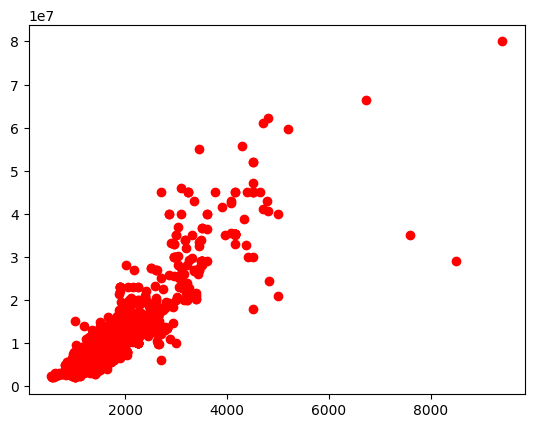

In [ ]:
# Ploting the graph
import matplotlib.pyplot as plt

# plot the training set
plt.scatter([feature for feature, label in training_set], [label for feature, label in training_set], color='red')

# plot the slope and intercept
plt.plot([feature for feature, label in training_set], [predict(slope, intercept, feature) for feature, label in training_set], color='blue')